In [1]:
import numpy as np

# 定数の設定
g = 9.81  # 重力加速度 (m/s^2)
depth = 90  # 水深 (m)
x_max = 200000  # 到達位置の最大値 (m)

# 津波の伝播速度の関数
def wave_speed(depth):
    return np.sqrt(g * depth)

# 津波の伝播速度 (c)
c = wave_speed(depth)  # km/hに換算する必要がある場合は * 3.6 を追加

# 到達時間の関数
def arrival_time(x, c):
    return x / c

# 正解の到達時間 (Δx=1mの場合)
x_true = np.arange(depth, x_max + 1, 1)
t_true = arrival_time(x_true, c)

# Δxが1000等分、100等分、10等分の場合の到達時間
delta_x_values = [1000, 100, 10]
t_approximations = []

for delta_x in delta_x_values:
    x_approx = np.arange(depth, x_max + 1, delta_x)
    t_approx = arrival_time(x_approx, c)
    t_approximations.append(t_approx)

# 計算の精度についての議論
# 正解との比較を行います

for i, delta_x in enumerate(delta_x_values):
    max_error = np.max(np.abs(t_true - t_approximations[i]))
    print(f"Δx = {delta_x}m の場合の最大誤差: {max_error}秒")

# グラフのプロット
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_true, t_true, label="正解 (Δx=1m)", color='blue')
for i, delta_x in enumerate(delta_x_values):
    plt.plot(x_approx, t_approximations[i], label=f"Δx={delta_x}m", alpha=0.7)

plt.xlabel("到達位置 (m)")
plt.ylabel("到達時間 (秒)")
plt.legend()
plt.title("到達時間の推定")
plt.show()


ValueError: operands could not be broadcast together with shapes (199911,) (200,) 

In [ ]:
import numpy as np
Long    = []
Lat     = []
Elev    = []
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Topo27m.txt', newline = '') as input_file:   #import text file
    head = input_file.readlines()                               #read all lines in text file
    Topo = [i.split() for i in head]                            #split column in each line in text file
    for i in Topo:
        Long.append(i[0])                                       #read 1st column
        Lat.append(i[1])                                        #read 2nd column
        Elev.append(i[2])                                       #read 3rd column

### Convert strings to floats/integers ###
Long    = [float(i) for i in Long]
Lat     = [float(i) for i in Lat]
Elev    = [float(i) for i in Elev]
Topo_out = np.stack([Long,Lat,Elev], axis=1)
#print(Topo_out)

### save as CSV file ###
np.savetxt('/content/drive/MyDrive/Topo_csv.csv', Topo_out,  delimiter=',', fmt='%.2f')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
Long    = []
Lat     = []
Elev    = []
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Topo27m.txt', newline = '') as input_file:   #import text file
    head = input_file.readlines()                               #read all lines in text file
    Topo = [i.split() for i in head]                            #split column in each line in text file
    for i in Topo:
        Long.append(i[0])                                       #read 1st column
        Lat.append(i[1])                                        #read 2nd column
        Elev.append(i[2])                                       #read 3rd column

### Convert strings to floats/integers ###
Long    = [float(i) for i in Long]
Lat     = [float(i) for i in Lat]
Elev    = [float(i) for i in Elev]
### prepare grid data from imported coordinates ###
ncol = 810                      #no. of columns
nrow = 1124                     #no. of row
x_array = np.linspace(min(Long), max(Long), ncol)
y_array = np.linspace(min(Lat), max(Lat), nrow)

### arrange Elevation data into (x,y) ###
x,y = np.meshgrid(x_array, y_array)
z = griddata((Long, Lat), Elev, (x, y), method='linear')

### plotting configurations ##
fig,ax = plt.subplots()

# plot topography #
plt.scatter(x,y,1,z, cmap = 'terrain')
cbar = plt.colorbar(label='Elevation above sea level [m]')

plt.xlabel('Longitude (m)')
plt.ylabel('Latitude (m)')

ax.set_aspect('equal')
plt.xlim(min(Long), max(Long))
plt.ylim(min(Lat), max(Lat))

fig.savefig('/content/drive/MyDrive/Topo_scatter.png',  overwrite=True, dpi=600)

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


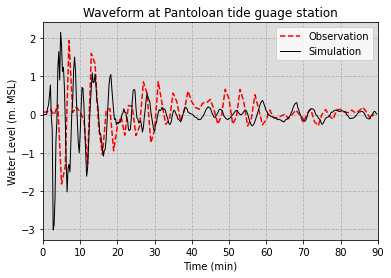

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###################################################################################################
#Data for plotting
#Simulation Results
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Sim_TideGuage.txt'
Sim = np.loadtxt(path, dtype=float)
tSim = np.arange(0,90,0.25)

#Observation Data
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Obs_TideGuage.txt'
Obs = np.loadtxt(path, dtype=float)
tObs = np.arange(0,90,1)                  #in minute

#Tide Level (+MSL)
Tide = 2.3

### Ploting Configurations ###
fig, ax = plt.subplots()
ax.plot(tObs, Obs, '--', markersize='3', color='red', label="Observation")                 #plot observation
ax.plot(tSim, Sim-Tide, color='black', linewidth=1, linestyle='solid', label="Simulation") #plot simulation. Simulation was adjusted to tide Level, do not forget to detide value.

ax.set(xlabel='Time (min)', ylabel='Water Level (m. MSL)',
       title='Waveform at Pantoloan tide guage station')
ax.set_xlim([0,90])
ax.grid(linestyle='dashed')
ax.set_facecolor('gainsboro')
plt.legend()

### Save Figure ###
fig.savefig('/content/drive/MyDrive/waveforms.png',  overwrite=True, dpi=600)
plt.show()

In [ ]:
import numpy as np

def f(x):
    return np.exp(x)-5.0*np.sin(x)+2.36*x

x0 = 0.5
EPS = 1e-5
IMAX = 50
for i in range(IMAX):
    x1 = f(x0)
    if abs(x1-x0)<EPS:
        print(i+1,x1)
        break
    else:
        x0=x1
    print(i+1,x1)



1 0.4315935776791131
2 0.4666761589776134
3 0.446438841279029
4 0.45755203626717367
5 0.4512574025770899
6 0.4547658233425247
7 0.45279191635777005
8 0.45389677953561725
9 0.45327654170813547
10 0.4536241594660637
11 0.45342915563007224
12 0.4535384913164704
13 0.45347717082864647
14 0.4535115566404162
15 0.45349227285794247
16 0.453503086777967
17 0.4534970223976573


In [ ]:
import numpy as np

def f(x):
#   return np.cos(x)-x**2.0
    return x**2+2*x-1
A = 0.0
B = 1.0
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    #C=(A*f(B)-B*f(A))/(f(B)-f(A))
    C=(A+B)/2
    if abs(f(C))<EPS:
        break
    else:
        if f(A)*f(C)<0:
             B=C
        elif f(C)*f(B)<0:
             A=C
    print(i+1,C)

1 0.5
2 0.25
3 0.375
4 0.4375
5 0.40625
6 0.421875
7 0.4140625
8 0.41796875
9 0.416015625
10 0.4150390625
11 0.41455078125
12 0.414306640625
13 0.4141845703125
14 0.41424560546875
15 0.414215087890625
16 0.4141998291015625
17 0.41420745849609375
18 0.4142112731933594
19 0.4142131805419922
20 0.4142141342163086
21 0.4142136573791504
22 0.4142134189605713


In [ ]:
import numpy as np

def f(x):
 #   return np.cos(x)-x**2.0
    return (1/x)-3
def df(x):
#    return -np.sin(x)-2.0*x
    return -1/(x**2)
x0 = 0.5
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    x1=x0-f(x0)/df(x0)
    if abs(x1-x0)<EPS:
        break
    else:
        x0=x1
    print(i+1,x1)

1 0.25
2 0.3125
3 0.33203125
4 0.3333282470703125
5 0.3333333332557231


In [ ]:
import numpy as np

def f(x):
 #   return np.cos(x)-x**2.0
    return x**2+2*x-1
def df(x):
#    return -np.sin(x)-2.0*x
    return 2*x+2
x0 = 0.5
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    x1=x0-f(x0)/df(x0)
    if abs(x1-x0)<EPS:
        break
    else:
        x0=x1
    print(i+1,x1)

1 0.4166666666666667
2 0.41421568627450983
3 0.41421356237468987


In [ ]:
import numpy as np
def f(x):
#    return np.cos(x)-x**2.0
    return x**2+2*x-1

x_1 = 0.0
x0 = 0.5
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    x1=x0-f(x0)*(x0-x_1)/(f(x0)-f(x_1))
    if abs(x1-x0)<EPS:
        break
    else:
        x_1=x0
        x0=x1
    print(i+1,x1)

1 0.4
2 0.41379310344827586
3 0.41421568627450983
4 0.41421356205732046


In [ ]:
import numpy as np
from scipy.optimize import minimize
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='Nelder-Mead',
                options={'xtol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


In [ ]:
x = [1.3, 0.7, 0.8, 1.9, 1.2]
x[1:]
#x[:-1]

[0.7, 0.8, 1.9, 1.2]

In [ ]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

res = minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 31
         Gradient evaluations: 31
[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
import numpy as np
def l(i,XX,X):
    numer=1.0
    denom=1.0
    for j in range(0,N):
        if j!=i:
            numer=numer*(XX-X[j])
            denom=denom*(X[i]-X[j])
    l=numer/denom
    return l
N=3
X=np.zeros(N+1)
Y=np.zeros(N+1)
X[0]=0.0;Y[0]=1.0;
X[1]=0.1;Y[1]=1.1051710;
X[2]=0.2;Y[2]=1.2214030;
XX=0.15
Pn=0.0
for i in range(0,N):
    Pn=Pn+Y[i]*l(i,XX,X)
print(Pn)

1.1619043749999998


In [ ]:
import numpy as np
def l(i,XX,X):
    numer=1.0
    denom=1.0
    for j in range(0,N):
        if j!=i:
            numer=numer*(XX-X[j])
            denom=denom*(X[i]-X[j])
    l=numer/denom
    return l
N=4
X=np.zeros(N+1)
Y=np.zeros(N+1)
dY=np.zeros(N+1)
X[0]=-1;Y[0]= 2;
X[1]= 0;Y[1]= 5;
X[2]= 2;Y[2]=-1;
X[3]= 3;Y[3]= 2;
XX= 1
Pn=0.0
for i in range(0,N):
    Pn=Pn+Y[i]*l(i,XX,X)
print(Pn)

1.9999999999999998


In [ ]:
import numpy as np
def l(i,XX,X):
    numer=1.0
    denom=1.0
    for j in range(0,N):
        if j!=i:
            numer=numer*(XX-X[j])
            denom=denom*(X[i]-X[j])
    l=numer/denom
    return l
N=2
#X=np.zeros(N+1)
#Y=np.zeros(N+1)
#dY=np.zeros(N+1)
X[0]=29;Y[0]= 0.484810;
X[1]=31;Y[1]= 0.515038;

XX= 30
Pn=0.0
for i in range(0,N):
    Pn=Pn+Y[i]*l(i,XX,X)
print(Pn)

0.49992400000000004


In [ ]:
import numpy as np
def l(i,XX,X):
    numer=1.0
    denom=1.0
    for j in range(0,N):
        if j!=i:
            numer=numer*(XX-X[j])
            denom=denom*(X[i]-X[j])
    l=numer/denom
    return l
N=3
X[0]=0.0;Y[0]=1.0;
X[1]=0.1;Y[1]=1.1051710;
X[2]=0.2;Y[2]=1.2214030;
XX=0.15
Pn=0.0
for i in range(0,N):
    Pn=Pn+Y[i]*l(i,XX,X)
print(Pn)

1.1619043749999998


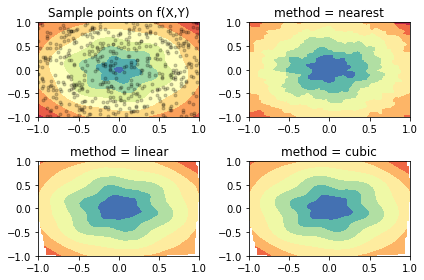

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi)
    return 5*(1-tau) + tau
T = f(X, Y)

# Choose npts random point from the discrete domain of our model function
npts = 500

#np.random.choice is randomly select value between (x,y)
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2)
cmap = plt.get_cmap('Spectral')
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T, cmap=cmap)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_xlim(-1.0, 1.0)
ax[0,0].set_ylim(-1.0, 1.0)
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
Ta = griddata((px, py), f(px,py), (X, Y), method='nearest')
ax[0,1].contourf(X, Y, Ta, cmap=cmap)
ax[0,1].set_title("method = nearest")

Tb = griddata((px, py), f(px,py), (X, Y), method='linear')
ax[1,0].contourf(X, Y, Tb, cmap=cmap)
ax[1,0].set_title("method = linear")

Tc = griddata((px, py), f(px,py), (X, Y), method='cubic')
ax[1,1].contourf(X, Y, Tc, cmap=cmap)
ax[1,1].set_title("method = cubic")

plt.tight_layout()
fig.savefig("./interpolation.png",  overwrite=True, dpi=600)
plt.show()

In [ ]:
import numpy as np
import math
def f(t, x):
   return(t**2+t+1)-(2*t+1)*x+x**2

def exact(t):
    return(t*np.exp(t)+t+1)/(np.exp(t)+1)

NM=20
t = [0]*(NM+1)
x = [0]*(NM+1)
m = 20
h = 0.1
t[0] = 0.0
x[0] = 0.5

for n in range(m):
    t[n+1] = t[n]+h
    x[n+1] = x[n]+h*f(t[n],x[n])

for n in range(m+1):
    print(f'{t[n]:6.2f}{x[n]:15.6f}{exact(t[n]):15.6f}')

  0.00       0.500000       0.500000
  0.10       0.575000       0.575021
  0.20       0.650062       0.650166
  0.30       0.725312       0.725557
  0.40       0.800870       0.801312
  0.50       0.876852       0.877541
  0.60       0.953369       0.954344
  0.70       1.030519       1.031812
  0.80       1.108391       1.110026
  0.90       1.187063       1.189050
  1.00       1.266597       1.268941
  1.10       1.347045       1.349740
  1.20       1.428443       1.431475
  1.30       1.510818       1.514165
  1.40       1.594180       1.597816
  1.50       1.678533       1.682426
  1.60       1.763867       1.767982
  1.70       1.850165       1.854465
  1.80       1.937404       1.941851
  1.90       2.025552       2.030108
  2.00       2.114573       2.119203


In [ ]:
import numpy as np

def fx(t, x, y):
   return -3*x - 2*y + 2*t
def fy(t, x, y):
   return  2*x + y - np.sin(t)

def exact_x(t):
    return (-0.5+t)*np.exp(-t) + (-2*t+6) - np.cos(t)
def exact_y(t):
    return -t*np.exp(-t) + (4*t-8) + 1.5*np.cos(t) - 0.5*np.sin(t)

NM=20
t = [0]*(NM+1)
x = [0]*(NM+1)
y = [0]*(NM+1)
m = 20
h = 0.1
t[0] =  0.0
x[0] =  4.5
y[0] = -6.5

for n in range(m):
    t[n+1] = t[n]+h
    x[n+1] = x[n]+h*fx(t[n],x[n],y[n])
    y[n+1] = y[n]+h*fy(t[n],x[n],y[n])

for n in range(m+1):
    print(f'{t[n]:6.2f}{x[n]:15.6f}{exact_x(t[n]):15.6f}{y[n]:15.6f}{exact_y(t[n]):15.6f}')

  0.00       4.500000       4.500000      -6.500000      -6.500000
  0.10       4.450000       4.443061      -6.250000      -6.247894
  0.20       4.385000       4.374314      -5.994983      -5.992981
  0.30       4.308497       4.296500      -5.737349      -5.737001
  0.40       4.223417       4.211907      -5.478936      -5.481246
  0.50       4.132179       4.122417      -5.221088      -5.226604
  0.60       4.036743       4.029546      -4.964704      -4.973605
  0.70       3.938661       3.934475      -4.710290      -4.722455
  0.80       3.839121       3.838092      -4.458008      -4.473081
  0.90       3.738986       3.741018      -4.207720      -4.225161
  1.00       3.638834       3.643637      -3.959028      -3.978161
  1.10       3.538990       3.546127      -3.711311      -3.731368
  1.20       3.439555       3.448478      -3.463765      -3.483916
  1.30       3.340441       3.350527      -3.215434      -3.234822
  1.40       3.241396       3.251970      -2.965245      -2.98

In [ ]:
from scipy.integrate import odeint

def f(x, t):
   return(t**2+t+1)-(2*t+1)*x+x**2

t=np.linspace(0.0,2.0,21)
x_init=0.5
x=odeint(f,x_init,t)
print(x)

[[0.5       ]
 [0.57502078]
 [0.65016596]
 [0.72555744]
 [0.80131229]
 [0.87754061]
 [0.95434364]
 [1.03181219]
 [1.11002549]
 [1.18905047]
 [1.2689414 ]
 [1.3497399 ]
 [1.43147527]
 [1.51416508]
 [1.59781619]
 [1.68242563]
 [1.76798174]
 [1.85446541]
 [1.94185119]
 [2.03010857]
 [2.11920301]]


In [ ]:
import numpy as np
from scipy import integrate
x=np.linspace(0,np.pi,4**10+1)
f=np.sin(x)
y=integrate.romb(f,x[1]-x[0])
print(y)

2.0


In [ ]:
import numpy as np
from scipy import integrate
x=np.linspace(0,np.pi,50)
f=np.sin(x)
y=integrate.simps(f,x)
print(y)

1.999999483788026


In [ ]:
from scipy import integrate
x=np.linspace(0,np.pi,50)
f=np.sin(x)
y=integrate.cumtrapz(f,x)
print(y)

[0.0020539  0.00820717 0.01843453 0.03269393 0.0509268  0.07305821
 0.09899721 0.12863721 0.16185643 0.19851835 0.23847232 0.28155416
 0.32758685 0.37638122 0.42773676 0.48144244 0.53727759 0.59501275
 0.65441068 0.71522731 0.77721272 0.8401122  0.90366729 0.96761683
 1.03169802 1.09564756 1.15920264 1.22210213 1.28408754 1.34490417
 1.4043021  1.46203726 1.5178724  1.57157809 1.62293363 1.671728
 1.71776069 1.76084253 1.8007965  1.83745842 1.87067764 1.90031764
 1.92625664 1.94838805 1.96662092 1.98088032 1.99110768 1.99726095
 1.99931485]


In [ ]:
import numpy as np
from scipy import integrate
x=np.linspace(0,1,50)
f1=0.0065*np.exp(-11.72*x)
f2=0.0065*np.exp(-6.57*x)
f3=0.0071*np.exp(-3.47*x)
f4=0.0073*np.exp(-2.47*x)
y1=integrate.simps(f1,x)
y2=integrate.simps(f2,x)
y3=integrate.simps(f3,x)
y4=integrate.simps(f4,x)
print(y1)
print(y2)
print(y3)
print(y4)

0.0005548929180317165
0.0009880534217507875
0.001982471128379479
0.002705494791073342


In [ ]:
import numpy as np
EPS=1e-7
IMAX=50
N=4
A=np.zeros((N+1,N+1))
A[1][1]= 9;A[1][2]= 2;A[1][3]= 1;A[1][4]= 1
A[2][1]= 2;A[2][2]= 8;A[2][3]=-2;A[2][4]= 1
A[3][1]=-1;A[3][2]=-2;A[3][3]= 7;A[3][4]=-2
A[4][1]= 1;A[4][2]=-1;A[4][3]=-2;A[4][4]= 6
B=np.zeros(N+1)
B[1]=20;B[2]=16;B[3]=8;B[4]=17

X=np.zeros(N+1)
XN=np.zeros(N+1)

for i in range(IMAX):
    err=0.0
    for j in range(1,N+1):
        XN[j]=B[j]
        for k in range(1,j):
            XN[j]=XN[j]-A[j][k]*XN[k]
        for k in range(j+1,N+1):
            XN[j]=XN[j]-A[j][k]*XN[k]
        XN[j]=XN[j]/A[j][j]
        err=err+abs(XN[j]-X[j])
    if err<EPS:
        break
    else:
        for j in range(1,N+1):
            X[j]=XN[j]
    print(i, X[1:N+1])

0 [2.22222222 1.44444444 1.87301587 3.32804233]
1 [1.32333921 1.72141387 2.77460737 3.82454823]
2 [1.10644629 1.93897174 2.94764089 3.95463454]
3 [1.02442012 1.98647588 2.98666299 3.98923029]
4 [1.00568389 1.99659099 2.99676092 3.99740482]
5 [1.00140581 1.99916318 2.99922026 3.99936631]
6 [1.00034301 1.99979852 2.99981038 3.99984605]
7 [1.00008295 1.9999511  2.99995389 3.99996266]
8 [1.00002014 1.99998811 2.99998881 3.99999093]
9 [1.00000489 1.99999711 2.99999728 3.9999978 ]
10 [1.00000119 1.9999993  2.99999934 3.99999947]
11 [1.00000029 1.99999983 2.99999984 3.99999987]
12 [1.00000007 1.99999996 2.99999996 3.99999997]
13 [1.00000002 1.99999999 2.99999999 3.99999999]


In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[ 1, 9, 3, 2, 1],
              [10, 2, 2, 8, 5],
              [ 1, 0, 5, 2, 1],
              [ 2, 7, 1, 2, 9],
              [ 3, 1, 2,20, 6]])
b = np.array([200,450,150,250,300])
x = np.linalg.solve(A,b)
print(x)

[30. 10. 20.  5. 10.]


In [ ]:
import numpy as np
import numpy.linalg as LA
A = np.array([[11, 7, -5],
              [ 0,10,-1],
              [ 2, 8, 3]])
w,v=LA.eig(A)
print(w)

[7. 9. 8.]


In [ ]:
import numpy as np
import numpy.linalg as LA
A = np.array([[4, -2],
              [1, 1]])
w,v=LA.eig(A)
print(w)
print(v)

[3. 2.]
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


In [ ]:
import numpy as np
import numpy.linalg as LA
A = np.array([[0.7,0.2],
              [0.3,0.8]])
w,v=LA.eig(A)
print(w)
print(v)

[0.5 1. ]
[[-0.70710678 -0.5547002 ]
 [ 0.70710678 -0.83205029]]


In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[ 2,-1],
             [ 3, 1]])
b = np.array([80,20])
x = np.linalg.solve(A,b)
print(x)

[ 20. -40.]


In [ ]:
import numpy as np
import math
n=10
l1=1
l2=0.5
a=20
b=-40
x1=np.array([[2],
            [3]])
x2=np.array([[-1],
            [1]])
for i in range(1,n+1):
    y=a*np.power(l1,i)*x1+b*np.power(l2,i)*x2
    print(i,y)

1 [[60.]
 [40.]]
2 [[50.]
 [50.]]
3 [[45.]
 [55.]]
4 [[42.5]
 [57.5]]
5 [[41.25]
 [58.75]]
6 [[40.625]
 [59.375]]
7 [[40.3125]
 [59.6875]]
8 [[40.15625]
 [59.84375]]
9 [[40.078125]
 [59.921875]]
10 [[40.0390625]
 [59.9609375]]


In [ ]:
import numpy as np
import math
NM=3
y=[0]*NM
EPS=1.0E-6
n=3
a=np.array([[11, 7, -5],
           [ 0,10, -1],
           [ 2, 8, 3]])
x=[1.0]*n
kmax=200
lambda1=10000
lambda2=10000
for k in range(1,kmax+1):
    error=0.0
    for i in range(n):
        y[i]=0.0
        for j in range(n):
            y[i]+=a[i][j]*x[j]
    sum1=0.0
    sum2=0.0
    for i in range(n):
        sum1+=y[i]*y[i]
        sum2+=y[i]*x[i]
    lambda1=sum1/sum2
    for i in range(n):
        x[i]=y[i]/math.sqrt(sum1)
    error=abs(lambda1-lambda2)/abs(lambda2)
    lambda2=lambda1
    if error<EPS:
       break;
    print(k,lambda1)

1 11.971428571428572
2 10.350359879266312
3 9.592671154608746
4 9.163959733696956
5 8.895402984932401
6 8.718297072733135
7 8.600184628949119
8 8.52429520644787
9 8.481474551759748
10 8.466440028114759
11 8.475717105269828
12 8.50630491242062
13 8.554767634801422
14 8.616742173312714
15 8.68694435644759
16 8.759670549235222
17 8.829599980330395
18 8.892562127842416
19 8.945973340351868
20 8.988842863746791
21 9.02145149946614
22 9.044895566135969
23 9.060659609457666
24 9.070300964650393
25 9.075259153362056
26 9.07676577763439
27 9.075820829661412
28 9.073206034842215
29 9.0695148407661
30 9.065186878277556
31 9.060540593320207
32 9.055801381864212
33 9.051124563053945
34 9.046613499243545
35 9.042333558425264
36 9.038322697136028
37 9.034599384372035
38 9.031168477575191
39 9.028025543999872
40 9.025160013843344
41 9.02255746193403
42 9.020201243032293
43 9.018073649924201
44 9.016156720737044
45 9.01443278957081
46 9.012884850268595
47 9.01149678501928
48 9.01025349598545
49 9.00914

Mounted at /content/drive
        Precipitation
M-Y                  
26-Oct          103.5
26-Nov           21.0
26-Dec           52.6
27-Jan           15.4
27-Feb           12.6
...               ...
20-Aug           72.5
20-Sep          191.5
20-Oct           63.0
20-Nov            7.0
20-Dec           21.5

[1131 rows x 1 columns]
102.70141467727674 82.91484766070964


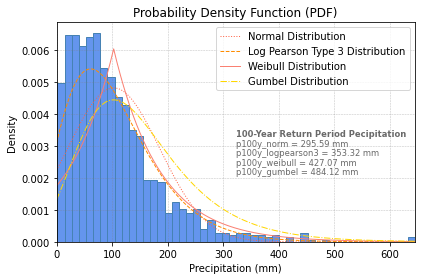

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare

### Import data ###
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/SENDAI_Rainfalls.csv', dtype = float, index_col=0, parse_dates=True)
print(df)

### Histogram of Raw Data ###
#RF = df['Precipitation'].hist(bins=50, edgecolor='turquoise', color='paleturquoise', zorder=3)

### Statistics ###
RF_max          = df['Precipitation'].max()
RF_mean         = df['Precipitation'].mean()
RF_deviation    = df['Precipitation'].std()
print(RF_mean, RF_deviation)

### Probability Density Function ###
axis_data = np.arange(0, RF_max, 0.1)
distnormal = stats.norm.pdf(axis_data, loc = RF_mean, scale = RF_deviation)                     #Normal Distribution Syntax: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
distlogpearson3 = stats.pearson3.pdf(axis_data, skew = 1.0, loc = RF_mean, scale = RF_deviation)  #Log Pearson Type 3 Syntax: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearson3.html
distweibull = stats.dweibull.pdf(axis_data, c = 1, loc = RF_mean, scale = RF_deviation)         #Weibull Syntax: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html
distgumbel = stats.gumbel_r.pdf(axis_data, loc = RF_mean, scale = RF_deviation)                 #Gumbel Syntax: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html

### Find Return period: Percent point function ###
### For example 100-Year: Tr = 100; pr = 1/100 = 0.010 ###
p100y_norm = stats.norm.ppf([0.990], loc = RF_mean, scale = RF_deviation)
p100y_logpearson3 = stats.pearson3.ppf([0.990], skew = 1, loc = RF_mean, scale = RF_deviation)
p100y_weibull = stats.dweibull.ppf([0.990], c = 1, loc = RF_mean, scale = RF_deviation)
p100y_gumbel = stats.gumbel_r.ppf([0.990], loc = RF_mean, scale = RF_deviation)

### Find Return period: Percent point function ###
### For example 100-Year: Tr = 100; pr = 1/100 = 0.010 ###
p100y_norm = stats.norm.ppf([0.990], loc = RF_mean, scale = RF_deviation)
p100y_logpearson3 = stats.pearson3.ppf([0.990], skew = 1, loc = RF_mean, scale = RF_deviation)
p100y_weibull = stats.dweibull.ppf([0.990], c = 1, loc = RF_mean, scale = RF_deviation)
p100y_gumbel = stats.gumbel_r.ppf([0.990], loc = RF_mean, scale = RF_deviation)

############ Plotting Preferences ############
fig, ax = plt.subplots()

### Plot: Probability Density Function ###
df['Precipitation'].hist(bins = 50, density=True, edgecolor = 'steelblue', color = 'cornflowerblue')
plt.plot(axis_data, distnormal, color = 'tomato', linewidth = 1, linestyle = ':',label = 'Normal Distribution')
plt.plot(axis_data, distlogpearson3, color = 'darkorange', linewidth = 1, linestyle = '--', label = 'Log Pearson Type 3 Distribution')
plt.plot(axis_data, distweibull, color = 'salmon', linewidth = 1, linestyle = '-', label = 'Weibull Distribution')
plt.plot(axis_data, distgumbel, color = 'gold', linewidth = 1, linestyle = '-.', label = 'Gumbel Distribution')

### Label: Return period ###
plt.text(0.5*RF_max, 0.0033, "100-Year Return Period Pecipitation" , fontsize='small', color = 'dimgrey', weight='bold')
text_norm = "p100y_norm = %.2f mm" %float(p100y_norm)
plt.text(0.5*RF_max, 0.0030, text_norm, fontsize='small', color = 'dimgrey')
text_logpearson3 = "p100y_logpearson3 = %.2f mm" %float(p100y_logpearson3)
plt.text(0.5*RF_max, 0.0027, text_logpearson3, fontsize='small', color = 'dimgrey')
text_weibull = "p100y_weibull = %.2f mm" %float(p100y_weibull)
plt.text(0.5*RF_max, 0.0024, text_weibull, fontsize='small', color = 'dimgrey')
text_gumbel = "p100y_gumbel = %.2f mm" %float(p100y_gumbel)
plt.text(0.5*RF_max, 0.0021, text_gumbel, fontsize='small', color = 'dimgrey')

plt.xlim(0, RF_max)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.tight_layout()
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
fig.savefig("./PDF_Rainfalls.png",  overwrite=True, dpi=600)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Depth  minor  moderate  major  complete
0   1.05    0.0       0.0    0.0       0.0
1   1.60    3.0       2.0    0.0       1.0
2   1.95    5.0       1.0    0.0       0.0
3   2.28    8.0       4.0    1.0       0.0
4   2.67   10.0       5.0    2.0       0.0
5   3.00   11.0       6.0    3.0       1.0
6   3.20   13.0      10.0    2.0       1.0
7   3.40   14.0      12.0    5.0       4.0
8   3.70   14.0      13.0    6.0       4.0
9   4.03   15.0      14.0    8.0       6.0
2.410614982932722 [0.69731526]
2.8694560072241675 [0.7685559]
3.942009176683288 [1.03264034]
4.136173448629824 [0.94603334]


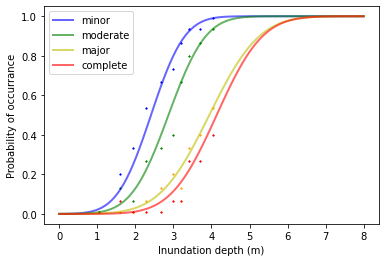

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

### Import data ###
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Collapse_Table.csv', dtype = float, parse_dates=True)
print(df)

#Finding the probability of the occurrance and Percent point function (PPF)
def ppf(index):
    max         = 15 #maximum chance of occurance
    prob        = df[index]/max #probability
    prob_re     = prob.replace([0,1], [0.01, 0.99]) #PPF cannot be neither 0 or 1, replace with 0.01 and 0.99
    #Find Percent point function (inverse of cdf, percentiles)
    ppf_prob = norm.ppf(prob_re) #inverse of the CDF of the standard normal distribution
    return ppf_prob

#print(ppf('minor'), ppf('moderate'), ppf('major'), ppf('complete'))

#Fitting depth and inverse of the CDF
def reg(index):
    #Y = aX + b
    depth = df['Depth'].to_numpy()
    norm = ppf(index)
    model = LinearRegression().fit(norm.reshape((-1, 1)), depth)

    A = model.intercept_
    B = model.coef_
    return A, B

#print(reg('minor'), reg('moderate'), reg('major'), reg('complete'))

#Fitting Parameters; Y = aX + b
minor_a, minor_b        = reg('minor')
moderate_a, moderate_b  = reg('moderate')
major_a, major_b        = reg('major')
complete_a, complete_b  = reg('complete')
#print(minor_a, minor_b)
#print(moderate_a, moderate_b)
#print(major_a, major_b)
#print(complete_a, complete_b)

#Plot Preferences
#plot CDF
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 8, 100)

ax.plot(x, norm.cdf(x, minor_a, minor_b), 'b-', lw=2, alpha=0.6, label='minor')
ax.plot(x, norm.cdf(x, moderate_a, moderate_b), 'g-', lw=2, alpha=0.6, label='moderate')
ax.plot(x, norm.cdf(x, major_a, major_b), 'y-', lw=2, alpha=0.6, label='major')
ax.plot(x, norm.cdf(x, complete_a, complete_b), 'r-', lw=2, alpha=0.6, label='complete')

#plot scatters
depth = df['Depth'].to_numpy()
def prob_plot(index):
    max         = 15 #maximum chance of occurance
    prob        = df[index]/max #probability
    prob_re     = prob.replace([0,1], [0.01, 0.99])
    return prob_re
ax.scatter(depth, prob_plot('minor'), s = 2.0 , c = 'blue', marker = '*')
ax.scatter(depth, prob_plot('moderate'), s = 2.0 , c = 'green', marker = '*')
ax.scatter(depth, prob_plot('major'), s = 2.0 , c = 'orange', marker = '*')
ax.scatter(depth, prob_plot('complete'), s = 2.0 , c = 'red', marker = '*')

ax.legend()
plt.xlabel('Inundation depth (m)')
plt.ylabel('Probability of occurrance')

fig.savefig("./Output.png", dpi=600)
plt.show()

In [ ]:
#required libraries
!pip install rasterio
import rasterio as rio #to handle raster data
from pathlib import Path #to point directory paths
import numpy as np #multi-dimensional array calculation
import matplotlib.pyplot as plt #plots, visualization

#set the path to the folder containing Sentinel-2A images
from google.colab import drive
drive.mount('/content/drive')
pathB03 = '/content/drive/MyDrive/T19LCG_20200827T145731_B03_10m.jp2'
pathB04 = '/content/drive/MyDrive/T19LCG_20200827T145731_B04_10m.jp2'
pathB08 = '/content/drive/MyDrive/T19LCG_20200827T145731_B08_10m.jp2'

# Loading GREEN, RED and NIR bands
band_green= rio.open(pathB03).read()
band_red= rio.open(pathB04).read()
band_nir= rio.open(pathB08).read()

mask = np.ones(shape=band_nir.shape,dtype=bool)
mask = np.logical_and(mask,band_nir == 0.0)
band_nir[mask] = 1

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir.astype(float) + band_red.astype(float) + 1e-8)

#Calculate NDWI
ndwi = (band_green.astype(float) - band_nir.astype(float)) / (band_green.astype(float) + band_nir.astype(float) + 1e-8)

#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_red[0],cmap='Reds_r')
axs[0].title.set_text('Red Band')

fig.colorbar(im0,ax=axs[0])
im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1])

im2=axs[2].imshow(ndvi[0],vmin=-1,vmax=1,cmap='RdYlGn')
axs[2].title.set_text('NDVI')
fig.colorbar(im2,ax=axs[2])

#Task 1
#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_green[0],cmap='Greens')
axs[0].title.set_text('Green Band')
#fig.colorbar(im0,ax=axs[0],location='bottom')
fig.colorbar(im0,ax=axs[0])

im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1])

im2=axs[2].imshow(ndwi[0],vmin=-1,vmax=0,cmap='RdBu')
axs[2].title.set_text('NDWI')
fig.colorbar(im2,ax=axs[2])

     |████████████████████████████████| 19.3 MB 5.7 MB/s 


MessageError: ignored

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/titanic.xls')
df.head()

#Use all parameters to predict
#Arrange data
df.drop(columns=['name','ticket','cabin','boat','body','home.dest'], inplace=True)
df['sex']=df['sex'].replace({'male':0,'female':1})
df['embarked'] = df['embarked'].replace({'C':1, 'Q':2, 'S':3})
df.dropna(inplace=True)
df.head()

X = df.drop(columns=['survived']).to_numpy()
Y = df['survived'].to_numpy()

#Apply K Means
kmeans = KMeans(n_clusters=2,random_state=100)
df['predict'] = kmeans.fit_predict(X)

df[df['survived']==df['predict']].shape[0] / df.shape[0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.6222435282837967

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,pclass,survived,sex,age,sibsp,parch,fare,embarked,predict
pclass,1.000000,-0.317737,-0.141032,-0.409082,0.046333,0.016342,-0.564558,0.276547,-0.376980
survived,-0.317737,1.000000,0.536332,-0.057416,-0.011403,0.115436,0.247858,-0.202258,0.172692
sex,-0.141032,0.536332,1.000000,-0.066007,0.096464,0.222531,0.186400,-0.109425,0.147441
age,-0.409082,-0.057416,-0.066007,1.000000,-0.242345,-0.149311,0.177205,-0.083269,0.106192
sibsp,0.046333,-0.011403,0.096464,-0.242345,1.000000,0.373960,0.142131,0.045510,0.052322
parch,0.016342,0.115436,0.222531,-0.149311,0.373960,1.000000,0.217650,0.011230,0.170967
fare,-0.564558,0.247858,0.186400,0.177205,0.142131,0.217650,1.000000,-0.301455,0.817999
embarked,0.276547,-0.202258,-0.109425,-0.083269,0.045510,0.011230,-0.301455,1.000000,-0.191188
predict,-0.376980,0.172692,0.147441,0.106192,0.052322,0.170967,0.817999,-0.191188,1.000000


In [ ]:
#Only use "sex" to predict
df.drop(columns=['age','sibsp','parch','fare','pclass','embarked'], inplace=True)
df.head()

X = df.drop(columns=['survived']).to_numpy()
Y = df['survived'].to_numpy()

#Apply K Means
kmeans = KMeans(n_clusters=2,random_state=100)
df['predict'] = kmeans.fit_predict(X)

df[df['survived']==df['predict']].shape[0] / df.shape[0]

0.7785234899328859

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,survived,sex,predict
survived,1.000000,0.536332,0.536332
sex,0.536332,1.000000,1.000000
predict,0.536332,1.000000,1.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xs = 4000
xm = 200000
ym = 7500
dx = 1000
x = np.linspace(xs,xm,dx)
y = (ym/xm)*x
np.sum((xm-xs)/dx/(np.sqrt(9.81*y))/60)

21.12967533980524

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xs = 4000
xm = 200000
ym = 7500
dx = 1000
x = np.linspace(xs,xm,dx)
y = (ym/xm)*x
np.sum((xm-xs)/dx/(np.sqrt(9.81*y))/60)
plt.plot(x/1000,np.sqrt(9.81*y)*3.6)
plt.show()

In [ ]:
import numpy as np

def f(x):
    return x**3-15*x**2+300
A = 1.0
B = 10.0
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    #C=(A*f(B)-B*f(A))/(f(B)-f(A))
    C=(A+B)/2
    if abs(f(C))<EPS:
        break
    else:
        if f(A)*f(C)<0:
             B=C
        elif f(C)*f(B)<0:
             A=C
    print(i+1,C)

1 5.5
2 7.75
3 6.625
4 6.0625
5 5.78125
6 5.640625
7 5.7109375
8 5.67578125
9 5.658203125
10 5.6669921875
11 5.67138671875
12 5.669189453125
13 5.6702880859375
14 5.67083740234375
15 5.670562744140625
16 5.6707000732421875
17 5.670631408691406
18 5.670665740966797
19 5.670682907104492
20 5.67069149017334
21 5.670687198638916
22 5.670689344406128
23 5.670688271522522
24 5.670688807964325
25 5.670689076185226
26 5.670689210295677
27 5.670689277350903
28 5.67068924382329
29 5.6706892270594835
30 5.670689235441387
31 5.670689231250435


In [ ]:
import numpy as np

def f(x):
    return x**3-15*x**2+300
def df(x):
    return 3*x**2-30*x
x0 = 2
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    x1=x0-f(x0)/df(x0)
    if abs(x1-x0)<EPS:
        break
    else:
        x0=x1
    print(i+1,x1)

1 7.166666666666667
2 5.486852105183158
3 5.669941148439817
4 5.670689213246244


In [ ]:
import numpy as np
def f(x):
    return x**3-15*x**2+300
x_1 = 1
x0 = 5
EPS = 1e-7
IMAX = 50
for i in range(IMAX):
    x1=x0-f(x0)*(x0-x_1)/(f(x0)-f(x_1))
    if abs(x1-x0)<EPS:
        break
    else:
        x_1=x0
        x0=x1
    print(i+1,x1)

1 5.847457627118644
2 5.673112249830804
3 5.6706764170589885
4 5.670689229371805


In [ ]:
import numpy as np
def l(i,XX,X):
    numer=1.0
    denom=1.0
    for j in range(0,N):
        if j!=i:
            numer=numer*(XX-X[j])
            denom=denom*(X[i]-X[j])
    l=numer/denom
    return l
N=4
X=np.zeros(N+1)
Y=np.zeros(N+1)
dY=np.zeros(N+1)
X[0]=-2;Y[0]= 11;
X[1]= -1;Y[1]= 8;
X[2]= 1;Y[2]=2;
X[3]= 2;Y[3]= -1;
XX= 0
Pn=0.0
for i in range(0,N):
    Pn=Pn+Y[i]*l(i,XX,X)
print(Pn)

5.0


In [ ]:
import numpy as np
def l(i,XX,X):
    numer=1.0
    denom=1.0
    for j in range(0,N):
        if j!=i:
            numer=numer*(XX-X[j])
            denom=denom*(X[i]-X[j])
    l=numer/denom
    return l
N=2
X=np.zeros(N+1)
Y=np.zeros(N+1)
dY=np.zeros(N+1)
X[0]=59;Y[0]= 0.515038;
X[1]=61;Y[1]= 0.484810;

XX= 60
Pn=0.0
for i in range(0,N):
    Pn=Pn+Y[i]*l(i,XX,X)
print(Pn)

0.49992400000000004


In [ ]:
import numpy as np

def fx(t, x, y):
   return -3*x - 2*y + 2*t
def fy(t, x, y):
   return  2*x + y - np.sin(t)

def exact_x(t):
    return (-0.5+t)*np.exp(-t) + (-2*t+6) - np.cos(t)
def exact_y(t):
    return -t*np.exp(-t) + (4*t-8) + 1.5*np.cos(t) - 0.5*np.sin(t)

NM=20
t = [0]*(NM+1)
x = [0]*(NM+1)
y = [0]*(NM+1)
m = 20
h = 0.1
t[0] =  0.0
x[0] =  4.5
y[0] = -6.5

for n in range(m):
    t[n+1] = t[n]+h
    x[n+1] = x[n]+h*fx(t[n],x[n],y[n])
    y[n+1] = y[n]+h*fy(t[n],x[n],y[n])

for n in range(m+1):
    print(f'{t[n]:6.2f}{x[n]:15.6f}{exact_x(t[n]):15.6f}{y[n]:15.6f}{exact_y(t[n]):15.6f}')

  0.00       4.500000       4.500000      -6.500000      -6.500000
  0.10       4.450000       4.443061      -6.250000      -6.247894
  0.20       4.385000       4.374314      -5.994983      -5.992981
  0.30       4.308497       4.296500      -5.737349      -5.737001
  0.40       4.223417       4.211907      -5.478936      -5.481246
  0.50       4.132179       4.122417      -5.221088      -5.226604
  0.60       4.036743       4.029546      -4.964704      -4.973605
  0.70       3.938661       3.934475      -4.710290      -4.722455
  0.80       3.839121       3.838092      -4.458008      -4.473081
  0.90       3.738986       3.741018      -4.207720      -4.225161
  1.00       3.638834       3.643637      -3.959028      -3.978161
  1.10       3.538990       3.546127      -3.711311      -3.731368
  1.20       3.439555       3.448478      -3.463765      -3.483916
  1.30       3.340441       3.350527      -3.215434      -3.234822
  1.40       3.241396       3.251970      -2.965245      -2.98

In [ ]:
import numpy as np
from scipy import integrate
x=np.linspace(0,np.pi*0.5,50)
f=np.sin(2*x)
y=integrate.simps(f,x)
print(y)

0.999999741894013


In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[ 3, 5, 4, 7, 3],
              [ 7, 3, 3, 1, 7],
              [ 1, 2, 3, 2, 3],
              [ 5, 1, 2, 4, 5],
              [ 1, 4, 2, 5, 3]])
b = np.array([400,350,200,300,250])
x = np.linalg.solve(A,b)
print(x)

[20. 10. 30. 20. 10.]


In [ ]:
import numpy as np
range(1, 6)


range(1, 6)